# Day 38 — Business Questions + GroupBy Insights
Palmer Penguins Dataset

## Kaggle Setup
Add the dataset and update file path below.

In [16]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# UPDATE PATH BELOW
df = pd.read_csv("/kaggle/input/datasets/satyajeetrai/palmer-penguins-dataset-for-eda/penguins.csv")
df.head()


,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Clean Numeric Columns

In [17]:

numeric_cols = [
    "bill_length_mm",
    "bill_depth_mm",
    "flipper_length_mm",
    "body_mass_g",
    "year"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.dropna(subset=numeric_cols)
df.head()


,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


## Q1: Which Species Has Highest Average Body Mass?

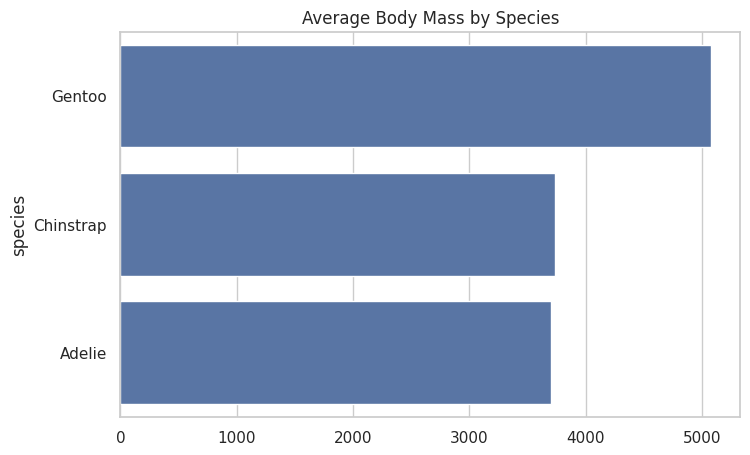

species
Gentoo       5076.016260
Chinstrap    3733.088235
Adelie       3700.662252
Name: body_mass_g, dtype: float64

In [18]:

species_mass = df.groupby("species")["body_mass_g"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=species_mass.values, y=species_mass.index)
plt.title("Average Body Mass by Species")
plt.show()

species_mass


## Q2: Do Males and Females Differ in Body Mass?

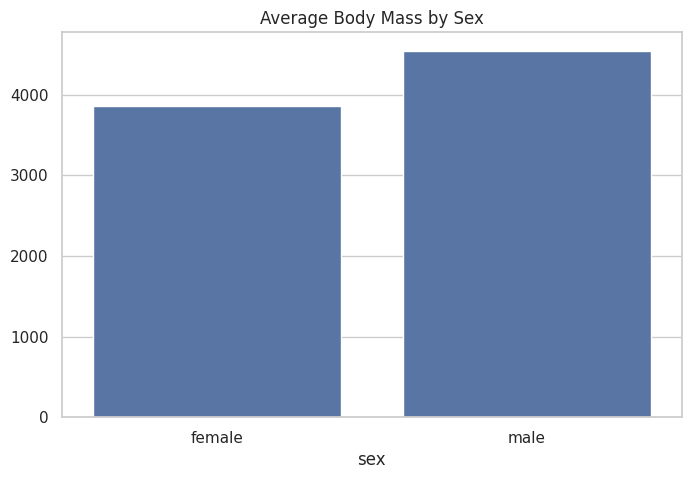

sex
female    3862.272727
male      4545.684524
Name: body_mass_g, dtype: float64

In [19]:

sex_mass = df.groupby("sex")["body_mass_g"].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=sex_mass.index, y=sex_mass.values)
plt.title("Average Body Mass by Sex")
plt.show()

sex_mass


## Q3: Which Island Has Largest Penguins on Average?

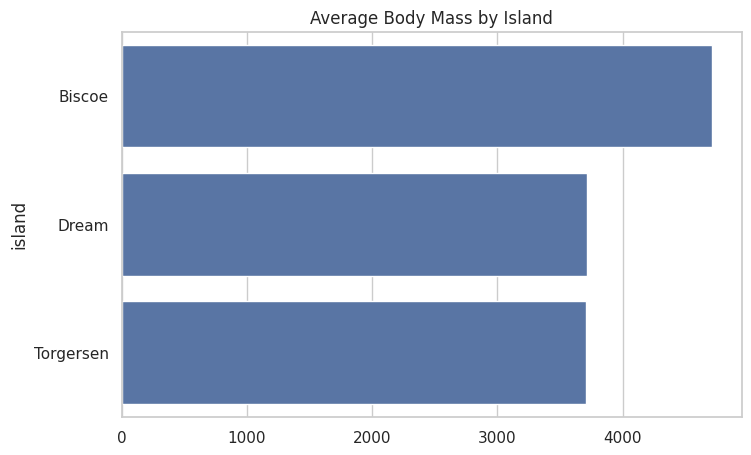

island
Biscoe       4716.017964
Dream        3712.903226
Torgersen    3706.372549
Name: body_mass_g, dtype: float64

In [20]:

island_mass = df.groupby("island")["body_mass_g"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=island_mass.values, y=island_mass.index)
plt.title("Average Body Mass by Island")
plt.show()

island_mass


## Interpretation

Write insights connecting groupby results to conclusions

1- Gentoo, Chinstrap and Adelie species had the highest average body mass

2- yes, males and females differ in body mass. males have slightly more body mass than females

3- Biscoe island has the highest number of penguins in average

